# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [2]:
loan_df = pd.read_csv('loan_data.csv')

In [3]:
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loan_df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


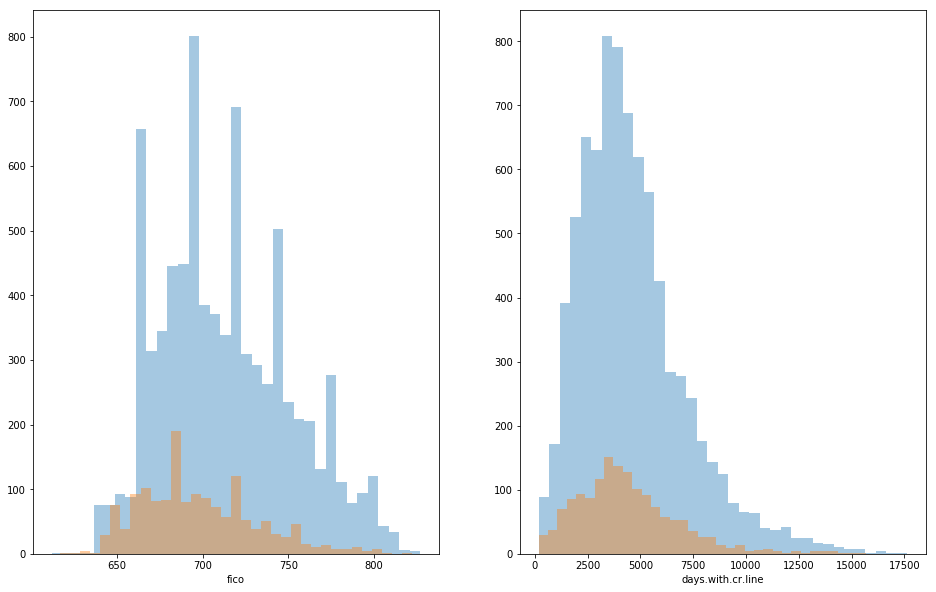

In [6]:
fig, ax = plt.subplots(1,2,figsize=(16,10))

sns.distplot(loan_df[loan_df['not.fully.paid'] == 0]['fico'], bins=35, kde=False, ax=ax[0])
sns.distplot(loan_df[loan_df['not.fully.paid'] == 1]['fico'], bins=35,kde=False, ax=ax[0])

sns.distplot(loan_df[loan_df['not.fully.paid'] == 0]['days.with.cr.line'], bins=35, kde=False, ax=ax[1])
sns.distplot(loan_df[loan_df['not.fully.paid'] == 1]['days.with.cr.line'], bins=35,kde=False, ax=ax[1])

#loan_df[loan_df['not.fully.paid'] == 0]['fico']


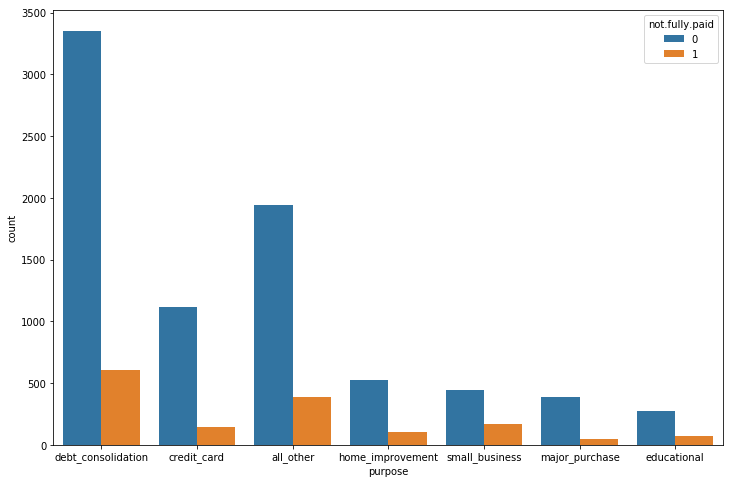

In [7]:
plt.figure(figsize=(12,8))
sns.countplot(loan_df['purpose'],hue=loan_df['not.fully.paid'])

# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities

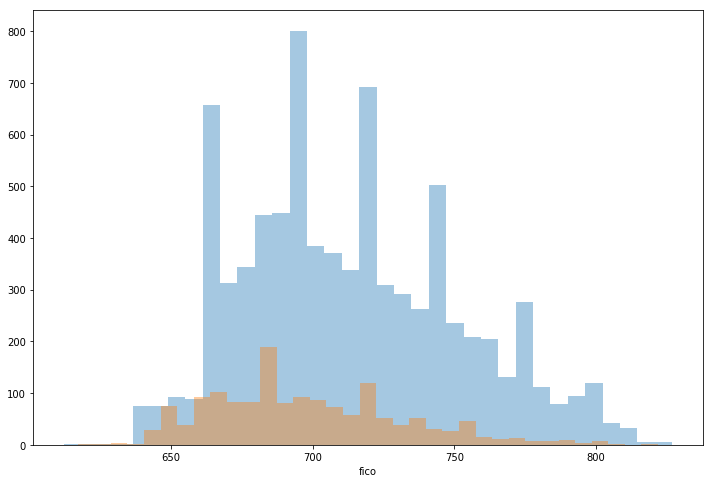

In [8]:
plt.figure(figsize=(12,8))
sns.distplot(loan_df[loan_df['not.fully.paid']==0]['fico'], kde=False, bins=35)
sns.distplot(loan_df[loan_df['not.fully.paid']==1]['fico'], kde=False, bins=35)

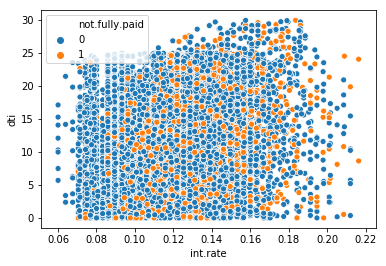

In [9]:

sns.scatterplot(x=loan_df['int.rate'], y=loan_df['dti'], hue=loan_df['not.fully.paid'])

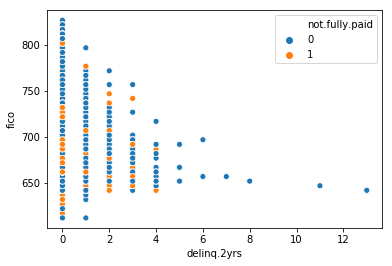

In [10]:
sns.scatterplot('delinq.2yrs','fico',hue='not.fully.paid',data=loan_df)

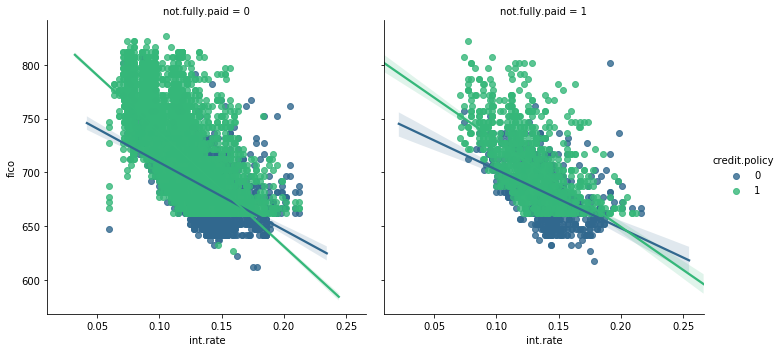

In [11]:
sns.lmplot('int.rate', 'fico', data=loan_df, hue='credit.policy', col='not.fully.paid', palette='viridis')

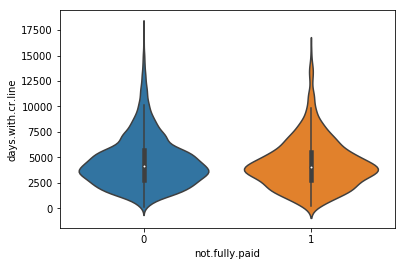

In [12]:
sns.violinplot(x=loan_df['not.fully.paid'],y=loan_df['days.with.cr.line'])

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [13]:
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [14]:
loan_df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le_ = LabelEncoder()
loan_df['purpose'] = le_.fit_transform(loan_df['purpose'])

In [16]:
loan_df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

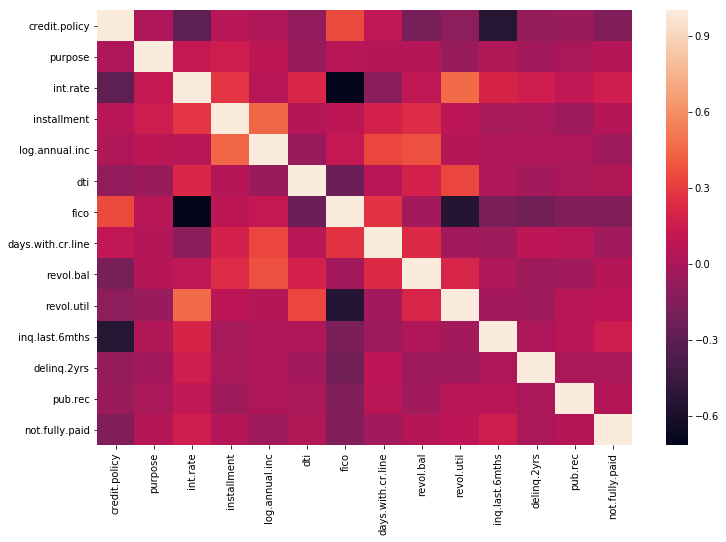

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_df.corr())

In [18]:
corr_matrix = loan_df.corr().abs()
upper_df = pd.DataFrame(np.triu(corr_matrix,k=1), columns=corr_matrix.columns)
to_drop = [column for column in upper_df.columns if any(abs(upper_df[column]) > 0.75)]
to_drop

[]

In [19]:
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [20]:
loan_df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X = loan_df.drop(['not.fully.paid'], axis=1)
y = loan_df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=122)

In [25]:
print('The value counts before oversampling is \n {0}'.format(y_train.value_counts()))

The value counts before oversampling is 
 0    5641
1    1063
Name: not.fully.paid, dtype: int64


In [26]:
from imblearn.over_sampling import BorderlineSMOTE
imb_sampler = BorderlineSMOTE(n_jobs=-1)
X_train, y_train = imb_sampler.fit_resample(X_train, y_train)


In [29]:
print('The value counts before oversampling is \n {0}'.format(np.unique(y_train,return_counts=True)))

The value counts before oversampling is 
 (array([0, 1], dtype=int64), array([5641, 5641], dtype=int64))


## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
predictions = dt_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,predictions))

[[1967  437]
 [ 362  108]]


In [36]:
from sklearn.metrics import f1_score

In [43]:
dt_model.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [41]:
from sklearn.model_selection import RandomizedSearchCV

dt_estimator = DecisionTreeClassifier()
dt_params = {'max_depth': np.arange(3,10),
             'max_features': np.arange(4,13),
             'min_weight_fraction_leaf': np.random.rand(5)/2}

dt_cv = RandomizedSearchCV(estimator=dt_estimator,param_distributions=dt_params,n_iter=10,cv=3,verbose=2,scoring='f1_weighted',n_jobs=-1).fit(X_train,y_train)
dt_cv_predictions = dt_cv.predict(X_test)
print(confusion_matrix(y_test, dt_cv_predictions))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed:    0.1s remaining:    0.4s


[[1623  781]
 [ 223  247]]


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


In [42]:
dt_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.15912928368136176,
                       presort=False, random_state=None, splitter='best')

## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=1200)
forest_model.fit(X_train,y_train)
prediction_forest = forest_model.predict(X_test)
confusion_matrix(y_test,prediction_forest)

array([[2326,   78],
       [ 436,   34]], dtype=int64)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [45]:

dt_estimator = DecisionTreeClassifier()
rf_estimator = RandomForestClassifier()
rf_params = {'n_estimators': np.arange(50,400,50),
             'max_depth': np.arange(3,10)}

rf_cv = RandomizedSearchCV(estimator=rf_estimator,param_distributions=rf_params,n_iter=10,cv=3,verbose=2,scoring='f1_weighted',n_jobs=-1).fit(X_train,y_train)
rf_cv_predictions = rf_cv.predict(X_test)
print(confusion_matrix(y_test, rf_cv_predictions))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   31.9s finished


[[2190  214]
 [ 373   97]]


In [48]:
rf_model = rf_cv.best_estimator_.fit(X_train,y_train)

In [49]:
rf_dec_func = rf_model.predict_proba(X_test)

In [50]:
dt_dec_func = dt_model.predict_proba(X_test)

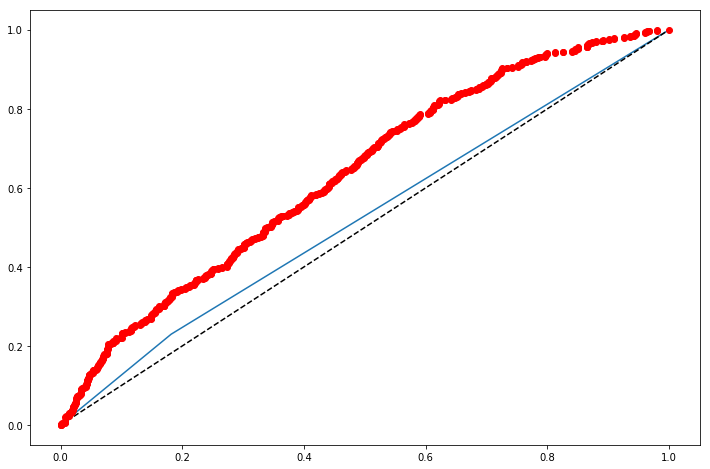

In [62]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, dt_dec_func[:,1])
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, rf_dec_func[:,1])
encoded_ytest.shape
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_rf,tpr_rf, 'ro')